In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#Carga de datos 
df = pd.read_csv('Bergamo_Italia.csv')

#Número de datos y columnas
df.shape

(3433, 51)

In [84]:
#Identificar valores nulos por columna 
df.isnull().sum()

Unnamed: 0                           0
source                               0
name                                 0
neighborhood_overview             1654
host_id                              0
host_since                           0
host_response_time                 458
host_response_rate                 458
host_is_superhost                   70
host_verifications                   0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                          554
bedrooms                            62
beds                               554
amenities                            0
price                              553
minimum_nights                       0
maximum_nights           

In [85]:
#Identificar el tipo de datos de las columnas que tienen valores nulos
df.dtypes[df.isnull().any()]

neighborhood_overview           object
host_response_time              object
host_response_rate              object
host_is_superhost               object
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
has_availability                object
estimated_revenue_l365d        float64
first_review                    object
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
license                        float64
dtype: object

In [86]:
#Resumen completo de valores por columna - Código proporcionado por IA
valores = pd.DataFrame({
    'Total_filas': len(df),
    'No_nulos': df.notna().sum(),
    'Nulos': df.isna().sum()
})
valores

,Total_filas,No_nulos,Nulos
Unnamed: 0,3433,3433,0
source,3433,3433,0
name,3433,3433,0
neighborhood_overview,3433,1779,1654
host_id,3433,3433,0
host_since,3433,3433,0
host_response_time,3433,2975,458
host_response_rate,3433,2975,458
host_is_superhost,3433,3363,70
host_verifications,3433,3433,0


In [87]:
#Identificar valores nulos por dataframe
df.isnull().sum().sum()

np.int64(14406)

APLICACIÓN DE METODOS DE SUsTITUCIÓN EN LOS VALORES NULOS PRESENTADOS 

In [88]:
#Realización de copia de dataframe original
#Se realiza una copia del dataframe originla para no alterar los datos originales
Bergamo = df.copy()

                    APLICACIÓN DE MÉTODO DE SUSTITUCIÓN DE VALORES POR UN VALOR EN CONCRETO 

In [89]:
#Conocimeinto de la columna 'neighborhood_overview'(1654 valores nulos). 
#Número de valores únicos en la columna: 
print(df['neighborhood_overview'].nunique())

#Al ser una columna de tipo object y que contiene una descripición del vecindario por parte del anfitrión, los NA'S pueden ser interpretados como que el anfitrión no ha proporcionado la descripción del vecindario.
#Por eso, se decide sustituir los valores nulos por una cadena de texto que indique "The description of the neighborhood is unknown." (Se desconoce la descripción del vecindario).
Bergamo ['neighborhood_overview'] = Bergamo['neighborhood_overview'].fillna('The description of the neighborhood is unknown.')

1207


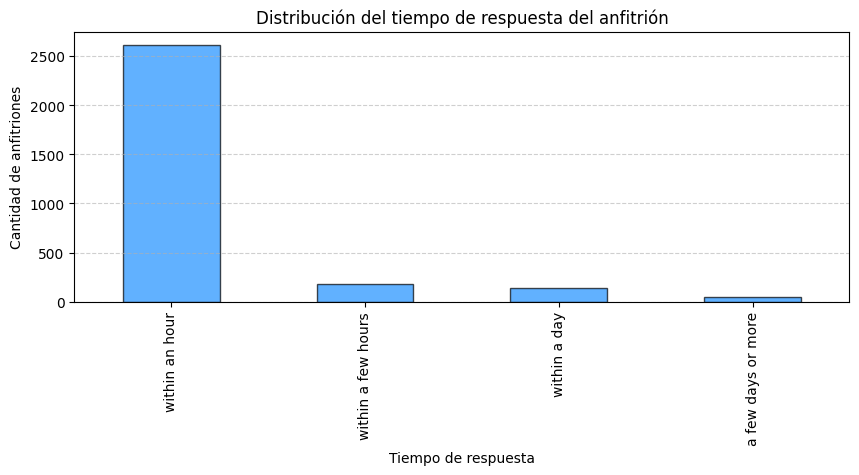

In [90]:
#Conocimiento de la columna 'host_response_time' (458 valores nulos).
#Se utiliza una gráfica para observar los valores de las columnas y detectar posibles outliers.
conteo = df['host_response_time'].value_counts()
plt.figure(figsize=(10,3.5))
conteo.plot(kind='bar', color='dodgerblue', alpha=0.7, edgecolor='black')
plt.title('Distribución del tiempo de respuesta del anfitrión')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Cantidad de anfitriones')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#El df contienen 3433 valores, de los cuales esta columna solo contienen 458 valores nulos. Aunque se concidera usar la moda o la mediana, pero eso puede sesgar en la distribución de los datos.
#Por eso, se decide sustituir los valores nulos por una cadena de texto que indique "No response time provided" (No se proporcionó tiempo de respuesta).
Bergamo ['host_response_time'] = Bergamo['host_response_time'].fillna('No response time provided')

In [91]:
#Conocimiento de la columna  'host_is_superhost' (70 valores nulos)
# Número de valores únicos de la columna: 
print(df['host_is_superhost'].nunique())
# Lista de valores únicos
print(df['host_is_superhost'].unique())

superhost = df['host_is_superhost'].value_counts(dropna=False)
print(superhost)

#Esta columna hace referencia a que anfintrión se considera como destacado, esto influye en el precio, reservas y confiabilidad.
#Como se busca hacer en un futuro un análisis descriptivo se crea una nueva categoría llamada 'Without consideration' (sin consideración)
Bergamo ['host_is_superhost'] = Bergamo['host_is_superhost'].fillna('Without consideration')

2
['t' nan 'f']
host_is_superhost
f      1855
t      1508
NaN      70
Name: count, dtype: int64


In [92]:
#Conocimiento de la columna 'has_availability' (216 valores nulos)
# Número de valores únicos de la columna: 
print(df['has_availability'].nunique())
# Lista de valores únicos, nos ayuda a ver de que manera como estan compuestos
print(df['has_availability'].unique())

#Esta columna nos indica si la propiedad puede reservarse actualmente, al no saber si esta disponible se susituye los NA'S por 'unknown' (se desconoce)
Bergamo ['has_availability'] = Bergamo['has_availability'].fillna('unknown')

1
['t' nan]


In [93]:
#Conocimiento de las columnas 'first_review' (649 valores nulos) y 'last_review' (649 valores nulos)
#La columna 'first_review', la fehca de la primera reseña, es decir, la más antigua, nos permite analizar historial y antigüedad del anuncio
#La columna 'last_review', la fecha de la última reseña, es decir la más reciente, esto es útil para identificar actividad reciente

# Lista de valores únicos, nos ayuda a ver de que manera como estan compuestos
print(df['first_review'].unique()) 
#print(df['last_review'].unique()) 

# Convertir a datetime, los valores inválidos o nulos se convierten en NaT -Codigo elaborado por IA
Bergamo['first_review'] = pd.to_datetime(Bergamo['first_review'], errors='coerce')
Bergamo['last_review'] = pd.to_datetime(Bergamo['last_review'], errors='coerce')

#OPCIÓN A: 
#Se utiliza máximo y minimo que permite analizar antigüedad, actividad sin perder filas y además mantienen la consistencia temporal de cada anuncio
    # Fecha mínima y máxima
    #min_fecha = Bergamo['first_review'].min()
    #max_fecha = Bergamo['last_review'].max()
    #Rellenar nulos
    #Bergamo['first_review'] = Bergamo['first_review'].fillna(min_fecha)
    #Bergamo['last_review'] = Bergamo['last_review'].fillna(max_fecha)

#OPCIÓN B 
#Aplicación de "forward fill" ("ffill") y "backward fill" ("bfill") 
    #Bergamo['last_review'] = Bergamo['last_review'].fillna(method="ffill") 
    #Bergamo['fist_review'] = Bergamo['fist_review'].fillna(method="bfill")

#OPCIÓN C 
#Sustituir los valores por una fecha nula para no sesgar el análisis posterior, quedaría de la siguiente manera: 
#Para 'first_review' usar la fecha '000-00-00', gracias a que es buscamos la fecha primera, la más antigua a la actualidad 
#Para 'last_review' usar la fecha '9999-99-99', indicando que es buscamos la ultima fecha, la más proxima a la actualidad 

Bergamo ['first_review'] = Bergamo['first_review'].fillna('0000-00-00')
Bergamo ['last_review'] = Bergamo['last_review'].fillna('9999-99-99')

['2010-08-13' '2017-04-18' '2016-02-24' ... '2025-03-15' '2025-03-07'
 '2025-03-19']


In [94]:
#Conocimeinto de la columna 'license'(3433 valores nulos).
#Número de valores únicos en la columna: 
print(df['license'].nunique())

#Esta columna muestra el número de licencia/permiso/registro de cada hospedaje, ayudandonos a ver el cumplimiento normativo y legalidad. 
#Al no tener información dada de alta, se reemplazara con la leyenda "NO INFORMATION PROVIDED" , es decir : 'sin información brindada'
Bergamo ['license'] = Bergamo['license'].fillna('NO INFORMATION PROVIDED')

0


                    APLICACIÓN DE MÉTODO DE SUSTITUCIÓN DE VALORES POR MEDIANA

In [95]:
#Conocimiento de la columna  'host_response_rate' (458 valores nulos)
# Número de valores únicos de la columna: 
print(df['host_response_rate'].nunique())
# Lista de valores únicos
print(df['host_response_rate'].unique())

#La columna contiene la tasa de respuesta del anfintrión, que nos ayuda a evalúar la confiabilidad del anfintrión 
#La columna contiene 3,433 filas de las cuales solo 458 son valores nulos 
conteo = df['host_response_rate'].value_counts(dropna=False)
conteo

#Se cambia los valores de texto a float para poder usar la mediana, ya que la mediana te da un valor representativo de la mayoría sin que unos pocos con tasas bajas distorsionen el resultado.
# Aseguramos que todo sea string y quitamos el '%' - Codógo elaborado por IA
Bergamo['host_response_rate'] = (Bergamo['host_response_rate'].astype(str).str.replace('%', '', regex=False))
       # Convertimos a float y pasamos los "nan" de texto a NaN reales
Bergamo['host_response_rate'] = pd.to_numeric(Bergamo['host_response_rate'], errors='coerce') 

#Aplicación de sustitucion por mediana
Bergamo['host_response_rate'] = Bergamo['host_response_rate'].fillna(Bergamo['host_response_rate'].median())


27
['100%' '67%' nan '0%' '33%' '90%' '25%' '60%' '98%' '86%' '89%' '80%'
 '92%' '77%' '70%' '99%' '88%' '96%' '97%' '50%' '95%' '91%' '20%' '13%'
 '44%' '75%' '83%' '71%']


In [96]:
#Conocimiento de las columnas 'bathrooms' (554 valores nulos), 'bedrooms' (62 valores nulos), 'beds' (554 valores nulos)
#La columna 'bathrooms' contiene el número de baños que contiene la instalación, esto es un indicador de comodidad y lujo.
#La columna 'beddrooms' contiene el número de habitaciones, nos ayuda a determinar la capacidad y segmentar propiedades
#La columna 'beds' contienen el número de camas, con esto estimamos la ocupación máxima y el tipo de huéspedes

#Se utiliza la mediana que refleja el valor central típico sin que los outliers influyan demasiado.
Bergamo['bathrooms'] = Bergamo['bathrooms'].fillna(Bergamo['bathrooms'].median())

Bergamo['bedrooms'] = Bergamo['bedrooms'].fillna(Bergamo['bedrooms'].median())

Bergamo['beds'] = Bergamo['beds'].fillna(Bergamo['beds'].median())

1574
[21600. 42360. 12384. ... 11772.  1452.  9096.]


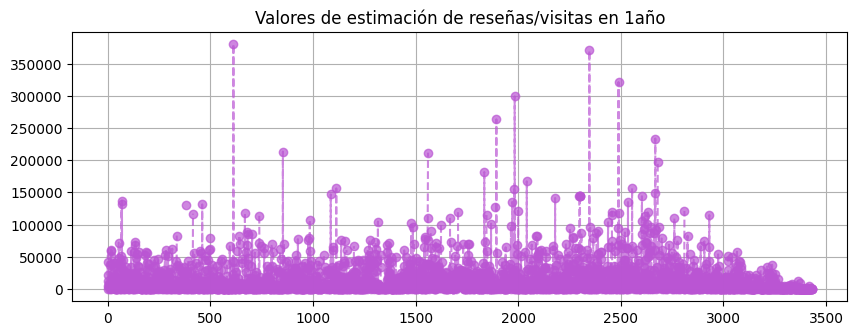

In [97]:
#Conocimiento de la columna 'estimated_revenue_l365d' (553 valores nulos)
# Número de valores únicos de la columna: 
print(df['estimated_revenue_l365d'].nunique())
# Lista de valores únicos, nos ayuda a ver de que manera como estan compuestos
print(df['estimated_revenue_l365d'].unique())

plt.figure(figsize=(10,3.5))
plt.plot(df['estimated_revenue_l365d'], marker='o', linestyle='--', alpha=0.7, color='mediumorchid')
plt.title("Valores de estimación de reseñas/visitas en 1año")
plt.grid(True)
plt.show()

#Se aplica la mediana gracia a que podemos observar que si existen outliers
Bergamo['estimated_revenue_l365d'] = Bergamo['estimated_revenue_l365d'].fillna(Bergamo['estimated_revenue_l365d'].median())

106


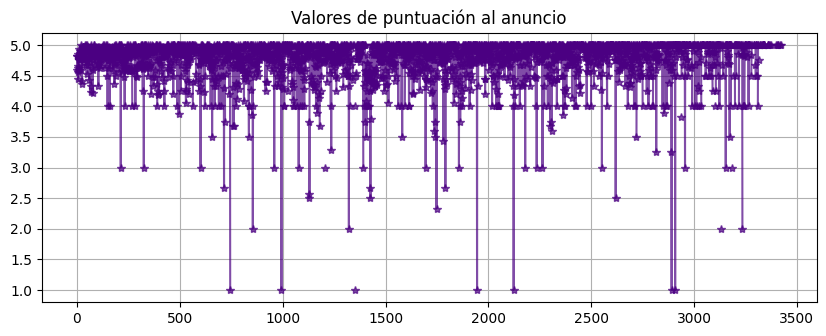

In [98]:
#Conocimeinto de la columna 'review_scores_rating'(649 valores nulos).
#Número de valores únicos en la columna: 
print(df['review_scores_rating'].nunique())
# Lista de valores únicos
#print(df['review_scores_rating'].unique())

#La columna describe la puntuación general del anuncio, nos ayuda a indicar la satisfación del huésped
plt.figure(figsize=(10,3.5))
plt.plot(df['review_scores_rating'], marker='*', linestyle='-', alpha=0.7, color='indigo')
plt.title("Valores de puntuación al anuncio")
plt.grid(True)
plt.show()

#Gracias a que podemos observar que si existen outliers, vamos a sustituir por mediana, para evitar que los valores extremos nos afeten en la media
Bergamo['review_scores_rating'] = Bergamo['review_scores_rating'].fillna(Bergamo['review_scores_rating'].median())

110


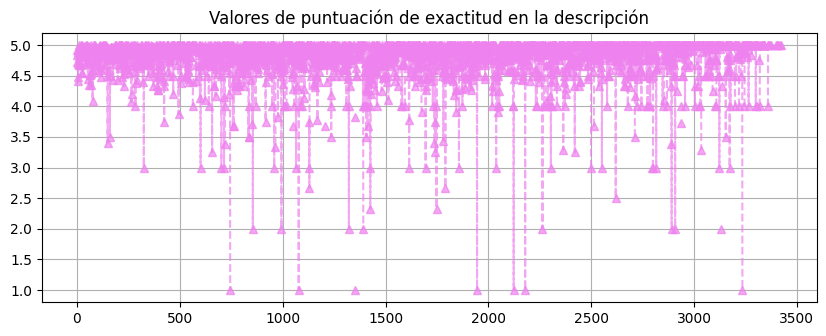

In [99]:
#Conocimeinto de la columna 'review_scores_accuracy'(649 valores nulos).
#Número de valores únicos en la columna: 
print(df['review_scores_accuracy'].nunique())
# Lista de valores únicos
#print(df['review_scores_accuracy'].unique())

#La columna describe la puntuación de exactitud, es decir, precisión en la descripción, es útil para evaluar la confianza del huésped. 
plt.figure(figsize=(10,3.5))
plt.plot(df['review_scores_accuracy'], marker='^', linestyle='--', alpha=0.7, color='violet')
plt.title("Valores de puntuación de exactitud en la descripción")
plt.grid(True)
plt.show()

#Gracias a que podemos observar que si existen outliers, vamos a sustituir por mediana, para evitar que los valores extremos nos afeten en la media
Bergamo['review_scores_accuracy'] = Bergamo['review_scores_accuracy'].fillna(Bergamo['review_scores_accuracy'].median())

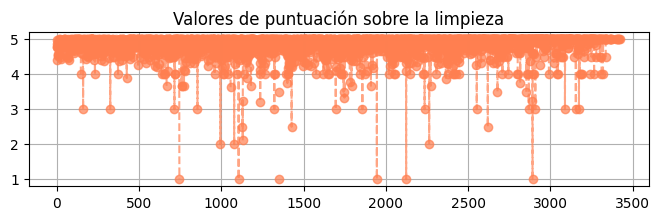

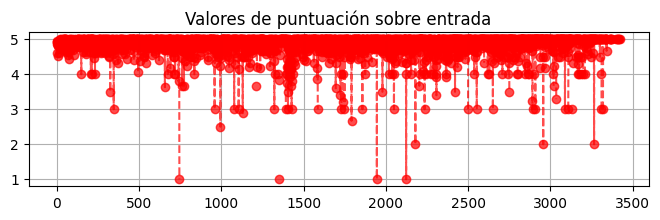

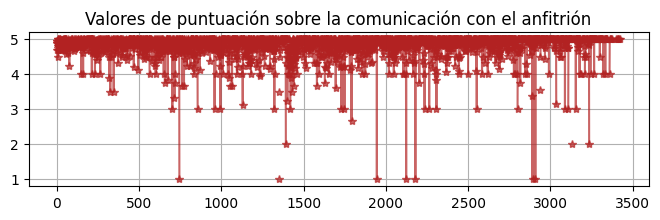

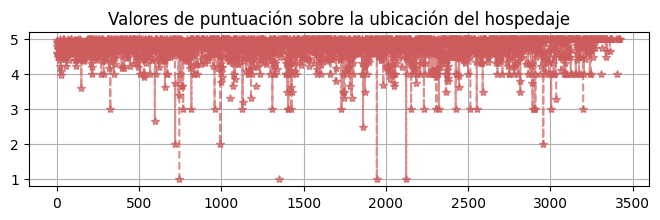

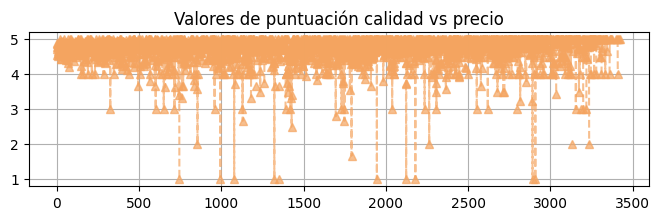

In [100]:
#Conocimiento de las columnas con 649 valores nulos: 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
# 'review_scores_location' y 'review_scores_value'.
#Las columnas sirven para poder evaluar su estancia dentro de las instalaciones, es decir, desde de la limpieza hasta la colidad - precio

# Verificamos que no tengan outliers           
plt.figure(figsize=(8,2))
plt.plot(df['review_scores_cleanliness'], marker='o', linestyle='--', alpha=0.7, color='coral')
plt.title("Valores de puntuación sobre la limpieza")
plt.grid(True)
plt.show() 
         
plt.figure(figsize=(8,2))
plt.plot(df['review_scores_checkin'], marker='o', linestyle='--', alpha=0.7, color='red')
plt.title("Valores de puntuación sobre entrada")
plt.grid(True)
plt.show() 

plt.figure(figsize=(8,2))
plt.plot(df['review_scores_communication'], marker='*', linestyle='-', alpha=0.7, color='firebrick')
plt.title("Valores de puntuación sobre la comunicación con el anfitrión")
plt.grid(True)
plt.show()         

plt.figure(figsize=(8,2))
plt.plot(df['review_scores_location'], marker='*', linestyle='--', alpha=0.7, color='indianred')
plt.title("Valores de puntuación sobre la ubicación del hospedaje")
plt.grid(True)
plt.show() 

plt.figure(figsize=(8,2))
plt.plot(df['review_scores_value'], marker='^', linestyle='--', alpha=0.7, color='sandybrown')
plt.title("Valores de puntuación calidad vs precio")
plt.grid(True)
plt.show() 


#Se utiliza la mediana que refleja el valor central típico sin que los outliers (demostrados en las gráficas) influyan demasiado.
Bergamo['review_scores_cleanliness'] = Bergamo['review_scores_cleanliness'].fillna(Bergamo['review_scores_cleanliness'].median())
Bergamo['review_scores_checkin'] = Bergamo['review_scores_checkin'].fillna(Bergamo['review_scores_checkin'].median())
Bergamo['review_scores_communication'] = Bergamo['review_scores_communication'].fillna(Bergamo['review_scores_communication'].median())
Bergamo['review_scores_location'] = Bergamo['review_scores_location'].fillna(Bergamo['review_scores_location'].median())
Bergamo['review_scores_value'] = Bergamo['review_scores_value'].fillna(Bergamo['review_scores_value'].median())

                    APLICACIÓN DE MÉTODO DE SUSTITUCIÓN DE VALORES POR MEDIA

In [101]:
#Conocimeinto de la columna 'price'(553 valores nulos). 
#Número de valores únicos en la columna: 
print(df['price'].nunique())
#Valores unicos de la columna:
#print(df['price'].unique())

#Convertir de tipo objeto la columna a float -Codigo elaborado por IA
Bergamo['price'] = Bergamo['price'].astype(str).str.replace('$', '', regex=False)
Bergamo['price'] = Bergamo['price'].str.replace(',', '', regex=False)
Bergamo['price'] = pd.to_numeric(Bergamo['price'], errors='coerce')
#Sustituir los valores NA's con promedio y redondeo a un decimal, ya que el uso de la media preserva la magnitud y la escala original de la variable, 
#lo que permite realizar análisis como regresiones, cálculos de ingresos estimados y comparaciones sin alterar la varianza de manera significativa.
Bergamo['price'] = Bergamo['price'].fillna(round(Bergamo['price'].mean(), 1))

918


                    VERIFICACIÓN DE VALORES NULOS Y EXPORTACIÓN

In [105]:
#Verificamos que la copia del df ya no tenga valores nulos y que la original aún los tenga 
print(Bergamo.isnull().sum().sum())
print(df.isnull().sum().sum())

0
14406


In [106]:
#Exportación de Bergamo a csv
Bergamo.to_csv('BergamoItalia.csv')